In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data_bin = pd.read_csv('data/data_processed_cat.csv')

In [35]:
data_bin.head()

,age,label,sex,weight,height,BMI,centyl,mean_for_age,SD_populacji,Z_score_BMI,...,EPA,C22:2n-6,C22:4n-6,C22:5n-6,C24:0,C24:1n-9,C22:5n-3,DHA,AA/DGLA,DGLA/LA
0,16.282192,0,0,94.5,1.65,34.710744,97.000000,20.790000,2.50000,5.568298,...,0.567,0.112,0.196,0.158,0.151,0.436,1.547,1.68,0.881664,0.226844
1,13.432877,0,1,67.0,1.60,26.171875,96.000000,19.100000,2.75000,2.571591,...,0.390,0.250,0.280,0.150,0.130,0.670,1.310,2.52,3.193548,0.161374
2,11.879452,0,1,70.0,1.56,28.763971,79.629032,18.726203,2.72443,0.683691,...,0.950,0.330,0.510,0.130,0.210,0.600,1.710,1.85,2.092457,0.222764
3,10.904110,0,0,62.0,1.45,29.488704,79.629032,18.726203,2.72443,0.683691,...,0.270,0.240,0.470,0.410,0.250,0.430,1.610,2.23,1.568849,0.243139
4,18.265753,0,1,79.5,1.72,26.872634,97.000000,21.640000,2.69000,1.945217,...,0.910,0.190,0.300,0.250,0.470,1.050,1.410,2.98,1.467967,0.170871


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB


In [37]:
X = data_bin.drop(columns=['label'])
y = data_bin['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=71)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(1.0, 30.0)

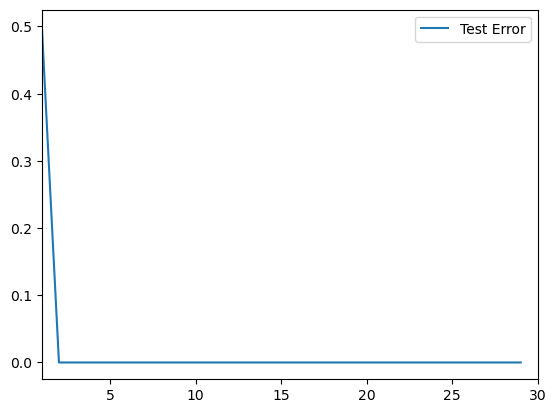

In [17]:
test_error = []

for n in range(1,30):
    model = DecisionTreeClassifier(max_depth=n)
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))
plt.plot(range(1,30),test_error,label='Test Error')
plt.legend()
plt.xlim((1,30))

In [45]:
rf_model = RandomForestClassifier(n_estimators=4,max_features='sqrt',random_state=71)
rf_model.fit(X_train,y_train)
preds = rf_model.predict(X_test)
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[38  0  0]
 [ 0 41  0]
 [ 1  0 30]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      1.00      1.00        41
           2       1.00      0.97      0.98        31

    accuracy                           0.99       110
   macro avg       0.99      0.99      0.99       110
weighted avg       0.99      0.99      0.99       110



In [46]:
dt_model = DecisionTreeClassifier(max_depth=2)
dt_model.fit(X_train,y_train)
preds = dt_model.predict(X_test)
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[34  3  1]
 [ 1 40  0]
 [ 0  0 31]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        38
           1       0.93      0.98      0.95        41
           2       0.97      1.00      0.98        31

    accuracy                           0.95       110
   macro avg       0.96      0.96      0.96       110
weighted avg       0.96      0.95      0.95       110



In [40]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train,y_train)
preds = knn_model.predict(X_test)
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[34  3  1]
 [ 1 40  0]
 [ 0  0 31]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        38
           1       0.93      0.98      0.95        41
           2       0.97      1.00      0.98        31

    accuracy                           0.95       110
   macro avg       0.96      0.96      0.96       110
weighted avg       0.96      0.95      0.95       110



In [47]:
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)
log_model.fit(X_train,y_train)
preds = log_model.predict(X_test)
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[38  0  0]
 [ 0 41  0]
 [ 0  0 31]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        31

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110



In [48]:
svc_model = SVC(kernel='linear', C=1000)
svc_model.fit(X_train,y_train)
preds = svc_model.predict(X_test)
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[38  0  0]
 [ 0 41  0]
 [ 0  0 31]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        31

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110



In [53]:
ada_model = AdaBoostClassifier(n_estimators=15)
ada_model.fit(X_train,y_train)
preds = ada_model.predict(X_test)
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))
pd.DataFrame(index=X.columns,data=ada_model.feature_importances_,columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)

[[37  0  1]
 [ 1 40  0]
 [ 0  0 31]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       1.00      0.98      0.99        41
           2       0.97      1.00      0.98        31

    accuracy                           0.98       110
   macro avg       0.98      0.98      0.98       110
weighted avg       0.98      0.98      0.98       110



,Feature Importance
beta-karoten,0.533333
GGTP,0.200000
ALT,0.133333
bil. bezpośrednia,0.066667
bilirubina,0.066667
...,...
TG,0.000000
TCH,0.000000
HOMA IR,0.000000
glukoza 0,0.000000


In [55]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train,y_train)
preds = gb_model.predict(X_test)
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))
pd.DataFrame(index=X.columns,data=gb_model.feature_importances_,columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)

[[37  0  1]
 [ 0 41  0]
 [ 0  0 31]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      1.00      1.00        41
           2       0.97      1.00      0.98        31

    accuracy                           0.99       110
   macro avg       0.99      0.99      0.99       110
weighted avg       0.99      0.99      0.99       110



,Feature Importance
GGTP,3.398150e-01
beta-karoten,3.126129e-01
ALT,2.880484e-01
EPA,2.630482e-02
Płytki krwi,1.777070e-02
...,...
C17:1,0.000000e+00
C18:0,0.000000e+00
age,0.000000e+00
n3/n6,-3.200816e-18


In [57]:
nb_model = MultinomialNB()
nb_model.fit(X_train,y_train)
preds = nb_model.predict(X_test)
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))
pd.DataFrame(index=X.columns,data=nb_model.feature_importances_,columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [20]:
RocCurveDisplay.from_predictions(y_test, preds)

ValueError: The target y is not binary. Got multiclass type of target.

In [21]:
pd.DataFrame(index=X.columns,data=rf_model.feature_importances_,columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)

,Feature Importance
visceral.1,0.159223
GGTP,0.158886
beta-karoten,0.155174
proinsulina,0.151019
mean_for_age,0.084871
...,...
ApoA1,0.000000
LCAT,0.000000
TG,0.000000
HOMA IR,0.000000


In [1]:
print('lol1/')
print('giga dziwne')

lol1/
giga dziwne


p:\Conda\envs\mgr\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
p:\Conda\envs\mgr\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Axes: >

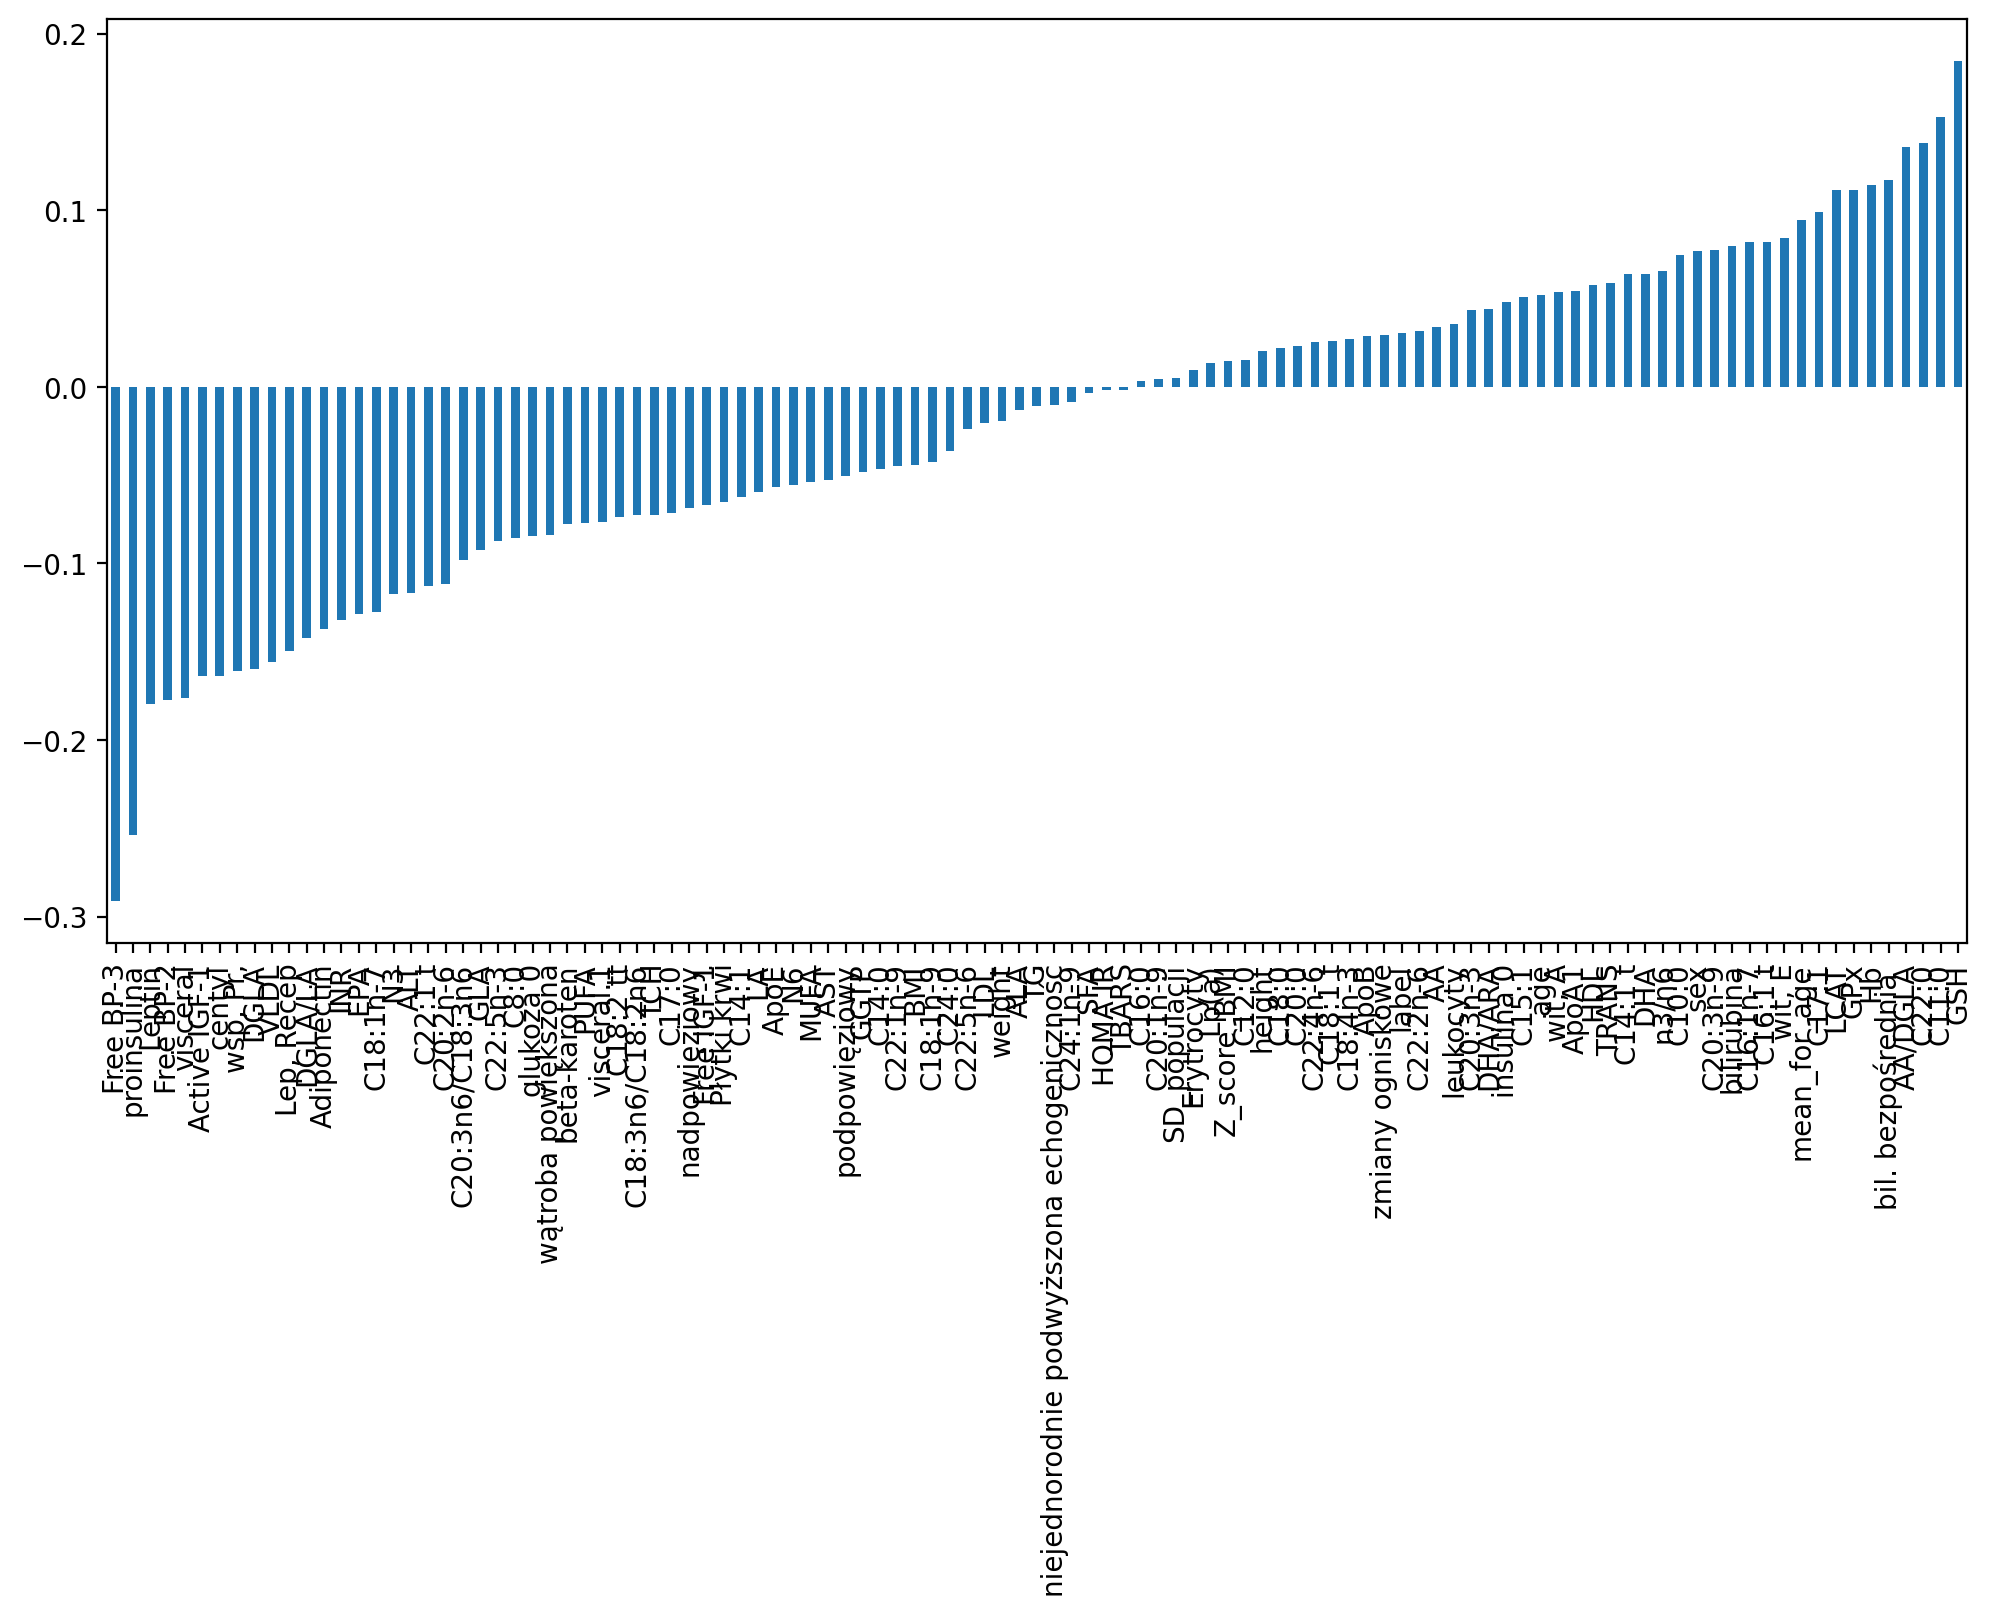

In [68]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)

cluster_labels = model.fit_predict(X)

cluster_data = data_bin.copy()
cluster_data['cluster'] = cluster_labels
cluster_data.corr()['cluster']

plt.figure(figsize=(12,6),dpi=200)
cluster_data.corr()['cluster'].iloc[:-1].sort_values().plot(kind='bar')

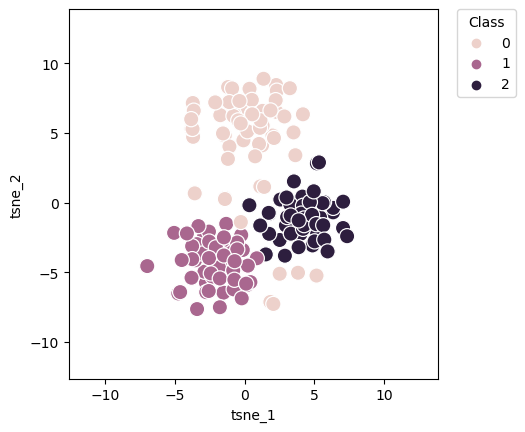

In [66]:

from sklearn.manifold import TSNE
y_true = y_test.copy()
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X_train)
tsne_result.shape
y_true = np.reshape(y_true, (y_true.shape[0],))

y_tsne = np.reshape(y_train, (y_train.shape[0],))
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y_tsne})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0, title = 'Class')
plt.show()